In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import gzip
from string import ascii_lowercase as lowercase

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


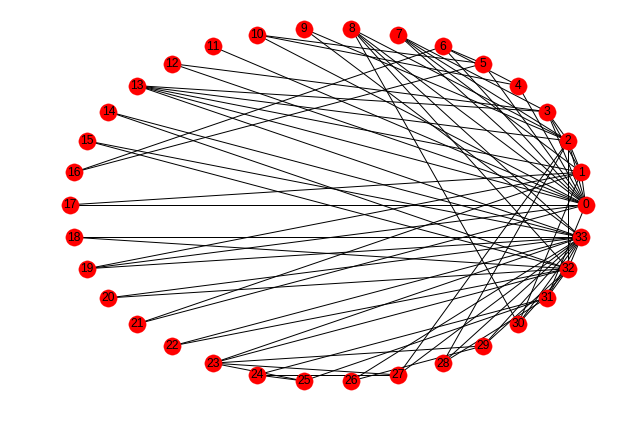

In [3]:
#Loading the Zachary Karate Club graph
#https://networkx.github.io/documentation/stable/auto_examples/graph/plot_karate_club.html
#Reference: Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

nx.draw_circular(G, with_labels=True)
plt.show()

In [4]:
def betweenness_centrality(G):
    ranking = nx.betweenness_centrality(G).items()
    print (ranking)
    r = [x[1] for x in ranking]
    avg_cent = sum(r)/len(r) # average centrality
    thresh = avg_cent*2 # threshold for average centrality
    G_copy = G.copy()
    for k, v in ranking:
      if v < thresh:
        G_copy.remove_node(k)
    return G_copy

G_copy = betweenness_centrality(G) # trimmed version

dict_items([(0, 0.43763528138528146), (1, 0.053936688311688304), (2, 0.14365680615680618), (3, 0.011909271284271283), (4, 0.0006313131313131313), (5, 0.02998737373737374), (6, 0.029987373737373736), (7, 0.0), (8, 0.05592682780182781), (9, 0.0008477633477633478), (10, 0.0006313131313131313), (11, 0.0), (12, 0.0), (13, 0.04586339586339586), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.03247504810004811), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.017613636363636363), (24, 0.0022095959595959595), (25, 0.0038404882154882154), (26, 0.0), (27, 0.02233345358345358), (28, 0.0017947330447330447), (29, 0.0029220779220779218), (30, 0.014411976911976909), (31, 0.13827561327561325), (32, 0.145247113997114), (33, 0.30407497594997596)])


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{0: Text(0.35958989071515973, -0.12390348360495099, '0'),
 2: Text(-0.04962926334151271, -0.11661502272213056, '2'),
 31: Text(-0.22678636307792704, -0.15582025380414102, '31'),
 32: Text(-0.3571408835983895, 0.18411141400156184, '32'),
 33: Text(-0.30099430831874163, 0.1711846682443029, '33')}

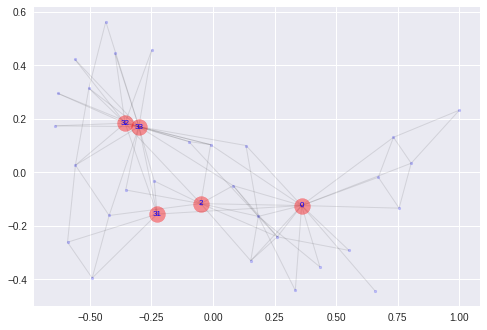

In [5]:
from pylab import show

#Original Graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(G,pos,alpha=0.1)

# Most important (trimmed graph) through betweenness centrality
nx.draw_networkx_nodes(G_copy,pos,node_color='r',alpha=0.4,node_size=254)
nx.draw_networkx_labels(G_copy,pos,font_size=8,font_color='b')
show()